In [2]:
import matplotlib.pyplot as plt
from pyod.models.pca import PCA
from pyod.models.kpca import KPCA
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import balanced_accuracy_score
import numpy as np

In [3]:
shuttle_data = loadmat('shuttle.mat')
X = shuttle_data['X']
y = shuttle_data['y'].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
# scaler = StandardScaler()
scaler = RobustScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

contamination = np.mean(y_train == 1)

In [4]:
pca = PCA(contamination=contamination, random_state=42)
pca.fit(X_train_std)

,n_components,None
,n_selected_components,None
,contamination,np.float64(0....2556181682396)
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,random_state,42
,weighted,True
,standardization,True


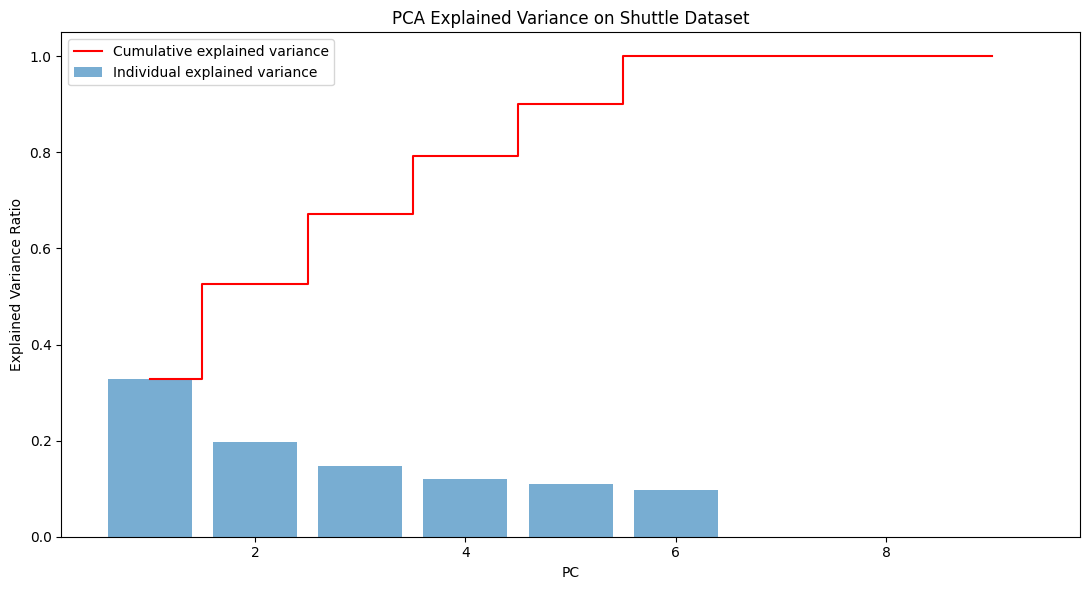

In [5]:
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

plt.figure(figsize=(11,6))
plt.bar(range(1, len(explained)+1), explained, alpha=0.6, label='Individual explained variance')
plt.step(range(1, len(cumulative)+1), cumulative, where='mid', label='Cumulative explained variance', color='red')
plt.xlabel('PC')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance on Shuttle Dataset')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
y_train_pred = pca.labels_
y_test_pred = pca.predict(X_test_std)

train_bal_acc = balanced_accuracy_score(y_train, y_train_pred)
test_bal_acc = balanced_accuracy_score(y_test, y_test_pred)

print(f"PCA Balanced Accuracy - Train: {train_bal_acc:.4f}, Test: {test_bal_acc:.4f}")

PCA Balanced Accuracy - Train: 0.9752, Test: 0.9709


In [ ]:
kpca = KPCA(contamination=contamination, random_state=42)
kpca.fit(X_train_std)

y_train_pred_kpca = kpca.labels_
y_test_pred_kpca = kpca.predict(X_test_std)

train_bal_acc_kpca = balanced_accuracy_score(y_train, y_train_pred_kpca)
test_bal_acc_kpca = balanced_accuracy_score(y_test, y_test_pred_kpca)

print(f"KPCA Balanced Accuracy - Train: {train_bal_acc_kpca:.4f}, Test: {test_bal_acc_kpca:.4f}")